In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
data = pd.read_excel("faangfactordata.xlsx", skiprows=[0])

In [2]:
pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True) 


apple = data.iloc[:,:20]
amazon = data.iloc[:,20:40]
meta = data.iloc[:,40:60]
netflix = data.iloc[:,60:80]
google = data.iloc[:,80:100]


cols = ['PX_TO_BOOK_RATIO', 'PE_RATIO', 'TOT_COMMON_EQY', 'TOTAL_EQUITY',
       'BS_SH_OUT', 'EQY_SH_OUT', 'EARN_YLD', 'EARN_YLD_HIST', 'BS_LT_BORROW',
       'SHORT_AND_LONG_TERM_DEBT', 'BS_TOT_ASSET', 'BEST_PE_RATIO',
       'BEST_PE_NXT_YR', 'TURNOVER', 'PX_VOLUME', 'REL_SHR_PX_MOMENTUM',
       'BETA_RAW_OVERRIDABLE', 'BETA_ADJ_OVERRIDABLE', 'CUR_MKT_CAP',
       'HISTORICAL_MARKET_CAP']
amazon.columns = cols
meta.columns = cols
netflix.columns = cols
google.columns = cols


apple['TCKR'] = 'AAPL'
amazon['TCKR'] = 'AMZN'
meta['TCKR'] = 'META'
netflix['TCKR'] = 'NFLX'
google['TCKR'] = 'GOOG'


concatenated_df = pd.concat([apple, amazon, meta, netflix, google], axis=0)
concatenated_df.reset_index(inplace=True)
concatenated_df.set_index(['Date', 'TCKR'], inplace=True)


factors = concatenated_df[["HISTORICAL_MARKET_CAP", "PX_TO_BOOK_RATIO", "PE_RATIO", "BETA_RAW_OVERRIDABLE", "REL_SHR_PX_MOMENTUM", "EARN_YLD"]]


factors.sort_index(inplace=True)


return_data = pd.read_csv('Model/returns.csv', index_col=['Date','TCKR'])
rfr = pd.read_csv('Model/riskfreerates.csv', )

/Users/cameronwalcott/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


In [3]:
return_data = pd.read_csv('Model/returns.csv', index_col=['Date','TCKR'])
rfr = pd.read_csv('Model/riskfreerates.csv', )

In [4]:
rfr = rfr[['DATE','DGS10','Daily Rf','Weekly Rf','Monthly Rf']]

In [5]:
factors

HISTORICAL_MARKET_CAP  PX_TO_BOOK_RATIO  PE_RATIO  \
Date       TCKR                                                      
2012-05-16 AAPL           5.605685e+05            4.9813   13.3157   
           AMZN           9.112950e+04           13.5142  180.4628   
           GOOG           2.089840e+05            3.2936   19.1833   
           META                    NaN           15.4954   86.3636   
           NFLX           6.386518e+03            6.0227   24.1510   
...                                ...               ...       ...   
2024-01-29 AAPL           2.976557e+06           40.0025   29.8645   
           AMZN           1.577593e+06            8.1778   54.2275   
           GOOG           1.740537e+06            6.6596   25.4382   
           META           9.064916e+05            6.6891   23.1998   
           NFLX           2.107020e+05           11.8309   46.1481   

                 BETA_RAW_OVERRIDABLE  REL_SHR_PX_MOMENTUM  EARN_YLD  
Date       TCKR                                                       
2012-05-16 AAPL                0.8244               33.041    7.5100  
           AMZN                1.0324               -8.241    0.5541  
           GOOG                0.9167               -7.470    5.2129  
           META                   NaN                  NaN    1.1579  
           NFLX                0.8047              -11.478    4.1406  
...                               ...                  ...       ...  
2024-01-29 AAPL                1.2581               -8.183    3.3485  
           AMZN                1.6150               10.396    1.8441  
           GOOG                1.3556                9.088    3.9311  
           META                1.7652               14.638    4.3104  
           NFLX                1.5282                7.316    2.1669  

[15270 rows x 6 columns]

In [6]:
factor_data = return_data.join(factors)

In [7]:
### Monthly Return Model ###

In [8]:
factor_data = factor_data.drop(['Close', 'Daily Log Returns', 'Weekly Returns', 'Weekly Log Returns', 'EARN_YLD'], axis=1)

In [9]:
factor_data

index  Daily Returns  Monthly Returns  Monthly Log Returns  \
Date       TCKR                                                               
2012-05-21 AAPL      0            NaN         0.043579             0.042656   
           AMZN      0            NaN         0.022512             0.022262   
           GOOG      0            NaN        -0.059598            -0.061448   
           META      0            NaN        -0.071408            -0.074085   
           NFLX      0            NaN        -0.049902            -0.051191   
...                ...            ...              ...                  ...   
2024-01-26 AAPL   2939      -0.009013              NaN                  NaN   
           AMZN   2939       0.008685              NaN                  NaN   
           GOOG   2939       0.002107              NaN                  NaN   
           META   2939       0.002442              NaN                  NaN   
           NFLX   2939       0.014982              NaN                  NaN   

                 HISTORICAL_MARKET_CAP  PX_TO_BOOK_RATIO  PE_RATIO  \
Date       TCKR                                                      
2012-05-21 AAPL           5.605685e+05            5.1200   13.6864   
           AMZN           9.112950e+04           13.3267  177.9587   
           GOOG           2.089840e+05            3.1760   18.4983   
           META                    NaN           12.6410   70.4545   
           NFLX           6.386518e+03            5.6662   22.7215   
...                                ...               ...       ...   
2024-01-26 AAPL           2.976557e+06           40.1465   29.9720   
           AMZN           1.577593e+06            8.2941   54.9983   
           GOOG           1.740537e+06            6.7497   25.7825   
           META           9.064916e+05            6.7051   23.2554   
           NFLX           2.107020e+05           12.1029   47.2090   

                 BETA_RAW_OVERRIDABLE  REL_SHR_PX_MOMENTUM  
Date       TCKR                                             
2012-05-21 AAPL                0.8289               32.648  
           AMZN                1.0321               -4.742  
           GOOG                0.9256               -7.103  
           META               -4.4469               -7.875  
           NFLX                0.7899              -13.349  
...                               ...                  ...  
2024-01-26 AAPL                1.2723               -7.908  
           AMZN                1.6148               10.279  
           GOOG                1.3555                9.138  
           META                1.7651               14.507  
           NFLX                1.5279                6.701  

[14700 rows x 9 columns]

In [10]:
factor_data = factor_data.loc[(factor_data.index.get_level_values('Date') > '2012-06-28')]
factor_data = factor_data.loc[(factor_data.index.get_level_values('Date') < '2020-01-31')]
factor_data

index  Daily Returns  Monthly Returns  Monthly Log Returns  \
Date       TCKR                                                               
2012-06-29 AAPL     28       0.026272         0.045822             0.044803   
           AMZN     28       0.031811         0.021677             0.021446   
           GOOG     28       0.027928         0.091196             0.087274   
           META     28      -0.008291        -0.301929            -0.359435   
           NFLX     28       0.016776        -0.169952            -0.186271   
...                ...            ...              ...                  ...   
2019-01-30 AAPL   1683       0.068335         0.058820             0.057155   
           AMZN   1683       0.048027         0.000778             0.000778   
           GOOG   1683       0.026101         0.046020             0.044993   
           META   1683       0.043207         0.078846             0.075892   
           NFLX   1683       0.035756         0.048905             0.047747   

                 HISTORICAL_MARKET_CAP  PX_TO_BOOK_RATIO  PE_RATIO  \
Date       TCKR                                                      
2012-06-29 AAPL            560568.4581            4.8983   13.7283   
           AMZN            103214.2000           13.8111  240.9023   
           GOOG            189650.4061            2.9351   17.4320   
           META             66605.4900            4.9524  123.0840   
           NFLX              3803.2642            5.4749   37.0765   
...                                ...               ...       ...   
2019-01-30 AAPL            738937.1227            6.6298   13.6062   
           AMZN            737467.2700           19.3781   85.3815   
           GOOG            723340.7008            4.4088   24.9671   
           META            374130.8600            5.6549   22.0198   
           NFLX            116859.9805           28.2939  126.6791   

                 BETA_RAW_OVERRIDABLE  REL_SHR_PX_MOMENTUM  
Date       TCKR                                             
2012-06-29 AAPL                0.8376               37.199  
           AMZN                1.0025               13.866  
           GOOG                0.9227              -15.239  
           META                0.5000              -23.782  
           NFLX                0.8001              -13.117  
...                               ...                  ...  
2019-01-30 AAPL                1.3540              -14.172  
           AMZN                1.5945               -2.144  
           GOOG                1.3531               -4.407  
           META                1.3146              -20.080  
           NFLX                1.8344               -5.411  

[8280 rows x 9 columns]

In [11]:
import matplotlib.pyplot as plt

In [12]:
factor_data['PX_TO_BOOK_RATIO'] = 1 / factor_data['PX_TO_BOOK_RATIO']
factor_data['PE_RATIO'] = 1 / factor_data['PE_RATIO']
                                            
non_features = ['Date','TCKR']
features = ['MARKET_CAP', 'B2P_RATIO', 'E2P_RATIO', 'BETA', 'MOMENTUM']
features_corr = ['MONTHLY_RETURN','MARKET_CAP', 'B2P_RATIO', 'E2P_RATIO', 'BETA', 'MOMENTUM']
eda_features = non_features + features

In [13]:
# Example dictionary for renaming columns
rename_dict = {
    'Monthly Returns': 'MONTHLY_RETURN',         # Adjust 'Monthly Returns' to your DataFrame's actual column name for monthly returns
    'Monthly Log Returns': 'MONTHLY_LOG_RETURN', # Adjust 'Monthly Log Returns' accordingly
    'HISTORICAL_MARKET_CAP': 'MARKET_CAP',       # Assuming 'HISTORICAL_MARKET_CAP' is your original column name for market cap
    'PX_TO_BOOK_RATIO': 'B2P_RATIO',             # Adjust 'PX_TO_BOOK_RATIO' accordingly for the Price to Book ratio
    'PE_RATIO': 'E2P_RATIO',                     # Adjust 'PE_RATIO' accordingly for the Price to Earnings ratio
    'BETA_RAW_OVERRIDABLE': 'BETA',              # Adjust 'BETA_RAW_OVERRIDABLE' accordingly
    'REL_SHR_PX_MOMENTUM': 'MOMENTUM',           # Adjust 'REL_SHR_PX_MOMENTUM' accordingly for momentum
}

# Rename columns using the rename() method
factor_data = factor_data.rename(columns=rename_dict)

In [14]:
factor_data['MARKET_CAP'] = np.log(factor_data['MARKET_CAP'])
factor_data

index  Daily Returns  MONTHLY_RETURN  MONTHLY_LOG_RETURN  \
Date       TCKR                                                             
2012-06-29 AAPL     28       0.026272        0.045822            0.044803   
           AMZN     28       0.031811        0.021677            0.021446   
           GOOG     28       0.027928        0.091196            0.087274   
           META     28      -0.008291       -0.301929           -0.359435   
           NFLX     28       0.016776       -0.169952           -0.186271   
...                ...            ...             ...                 ...   
2019-01-30 AAPL   1683       0.068335        0.058820            0.057155   
           AMZN   1683       0.048027        0.000778            0.000778   
           GOOG   1683       0.026101        0.046020            0.044993   
           META   1683       0.043207        0.078846            0.075892   
           NFLX   1683       0.035756        0.048905            0.047747   

                 MARKET_CAP  B2P_RATIO  E2P_RATIO    BETA  MOMENTUM  
Date       TCKR                                                      
2012-06-29 AAPL   13.236707   0.204152   0.072842  0.8376    37.199  
           AMZN   11.544562   0.072406   0.004151  1.0025    13.866  
           GOOG   12.152938   0.340704   0.057366  0.9227   -15.239  
           META   11.106542   0.201922   0.008125  0.5000   -23.782  
           NFLX    8.243615   0.182652   0.026971  0.8001   -13.117  
...                     ...        ...        ...     ...       ...  
2019-01-30 AAPL   13.512968   0.150834   0.073496  1.3540   -14.172  
           AMZN   13.510977   0.051605   0.011712  1.5945    -2.144  
           GOOG   13.491636   0.226819   0.040053  1.3531    -4.407  
           META   12.832361   0.176838   0.045414  1.3146   -20.080  
           NFLX   11.668732   0.035343   0.007894  1.8344    -5.411  

[8280 rows x 9 columns]

In [15]:
factor_data = factor_data.dropna()

In [16]:
# Example dates and tickers - replace these with your actual dates and tickers
dates = factor_data.index.get_level_values(0).unique() # Business days for example
dates = pd.to_datetime(dates)
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX'] * (len(factor_data) // 5)

In [17]:
dates

DatetimeIndex(['2012-06-29', '2012-07-02', '2012-07-03', '2012-07-05',
               '2012-07-06', '2012-07-09', '2012-07-10', '2012-07-11',
               '2012-07-12', '2012-07-13',
               ...
               '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30'],
              dtype='datetime64[ns]', name='Date', length=1656, freq=None)

In [18]:
len(tickers)

8280

In [19]:
temp = factor_data[['Daily Returns','MONTHLY_RETURN']]

In [20]:
# Exploratory Data Analysis #

In [21]:
factor_data.loc[(slice(None), 'AAPL'), :].describe()

,index,Daily Returns,MONTHLY_RETURN,MONTHLY_LOG_RETURN,MARKET_CAP,B2P_RATIO,E2P_RATIO,BETA,MOMENTUM
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,855.500000,0.000559,0.011595,0.008810,13.332830,0.204792,0.071039,0.974500,3.208210
std,478.190339,0.016125,0.073807,0.074206,0.252074,0.054476,0.013840,0.136042,15.706647
min,28.000000,-0.123558,-0.206304,-0.231054,12.794483,0.097099,0.047732,0.711800,-39.552000
25%,441.750000,-0.006971,-0.031966,-0.032488,13.129779,0.167946,0.059181,0.857275,-6.549000
50%,855.500000,0.000440,0.013350,0.013262,13.319053,0.194229,0.069647,0.997350,5.716500
75%,1269.250000,0.009151,0.063580,0.061641,13.520538,0.239099,0.080331,1.092900,14.425250
max,1683.000000,0.081982,0.214454,0.194295,13.886333,0.369045,0.107264,1.354000,37.199000


In [22]:
factor_data.loc[(slice(None), 'AMZN'), :].describe()

,index,Daily Returns,MONTHLY_RETURN,MONTHLY_LOG_RETURN,MARKET_CAP,B2P_RATIO,E2P_RATIO,BETA,MOMENTUM
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,855.500000,0.001401,0.028639,0.025208,12.454258,0.055031,0.003185,1.186050,13.129110
std,478.190339,0.019031,0.079900,0.078011,0.662859,0.011295,0.002452,0.151703,18.406232
min,28.000000,-0.109972,-0.236455,-0.269783,11.544562,0.035697,0.000436,0.965100,-23.399000
25%,441.750000,-0.007540,-0.021043,-0.021268,11.879738,0.046120,0.001181,1.067475,0.224250
50%,855.500000,0.000976,0.030957,0.030487,12.388713,0.051591,0.002185,1.148600,9.259000
75%,1269.250000,0.011106,0.075581,0.072861,12.956937,0.066309,0.004384,1.297300,25.642250
max,1683.000000,0.141311,0.309425,0.269588,13.794764,0.080498,0.013417,1.594500,58.416000


In [23]:
factor_data.loc[(slice(None), 'GOOG'), :].describe()

,index,Daily Returns,MONTHLY_RETURN,MONTHLY_LOG_RETURN,MARKET_CAP,B2P_RATIO,E2P_RATIO,BETA,MOMENTUM
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,855.500000,0.000925,0.018797,0.016868,12.987588,0.246058,0.035866,1.053987,5.021445
std,478.190339,0.014529,0.060757,0.059088,0.393060,0.030278,0.005125,0.141523,11.041380
min,28.000000,-0.080067,-0.142783,-0.154064,12.152938,0.181077,0.026698,0.826300,-15.872000
25%,441.750000,-0.005912,-0.020696,-0.020913,12.792126,0.225865,0.032644,0.940050,-1.820250
50%,855.500000,0.000571,0.015962,0.015836,12.966625,0.241502,0.034602,1.047300,3.867000
75%,1269.250000,0.008249,0.054141,0.052726,13.270789,0.266007,0.038017,1.127650,9.657500
max,1683.000000,0.162584,0.279949,0.246820,13.635177,0.346669,0.058370,1.415400,43.053000


In [24]:
factor_data.loc[(slice(None), 'META'), :].describe()

,index,Daily Returns,MONTHLY_RETURN,MONTHLY_LOG_RETURN,MARKET_CAP,B2P_RATIO,E2P_RATIO,BETA,MOMENTUM
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,855.500000,0.001205,0.027372,0.021932,12.290518,0.154841,0.018503,0.969922,8.554374
std,478.190339,0.022918,0.104631,0.100671,0.743149,0.046501,0.013029,0.392495,25.542562
min,28.000000,-0.189609,-0.357692,-0.442688,10.756105,0.084323,0.000616,-0.127400,-53.451000
25%,441.750000,-0.009101,-0.028472,-0.028885,11.843602,0.135114,0.009673,0.717400,-2.471250
50%,855.500000,0.001001,0.022704,0.022450,12.445316,0.146230,0.013545,1.102900,8.539500
75%,1269.250000,0.011799,0.073780,0.071186,12.924499,0.165953,0.026480,1.270300,18.599250
max,1683.000000,0.296115,0.608125,0.475069,13.238864,0.344863,0.059636,1.431000,101.119000


In [25]:
factor_data.loc[(slice(None), 'NFLX'), :].describe()

,index,Daily Returns,MONTHLY_RETURN,MONTHLY_LOG_RETURN,MARKET_CAP,B2P_RATIO,E2P_RATIO,BETA,MOMENTUM
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,855.500000,0.002634,0.056350,0.044361,10.373252,0.063014,0.006284,1.258723,27.707347
std,478.190339,0.031414,0.159625,0.142474,1.026047,0.038905,0.005198,0.222288,46.360910
min,28.000000,-0.250155,-0.340308,-0.415983,8.014302,0.022196,0.001508,0.756700,-52.319000
25%,441.750000,-0.011415,-0.041495,-0.042381,9.934921,0.042758,0.003345,1.103550,-4.781500
50%,855.500000,0.000672,0.050743,0.049498,10.596133,0.054060,0.004789,1.301350,18.476000
75%,1269.250000,0.015370,0.121417,0.114593,11.062021,0.066769,0.007295,1.363100,47.017250
max,1683.000000,0.422235,1.010747,0.698506,12.046204,0.237057,0.034015,1.856200,204.878000


In [26]:
# Select only the columns with numerical data corresponding to your factors
factors = factor_data[features]

In [27]:
# # Normalization
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(factors)

# Convert the array back to a DataFrame (optional, for better readability and further processing)
factor_data = pd.DataFrame(normalized_data, columns=factors.columns)
factor_data

,MARKET_CAP,B2P_RATIO,E2P_RATIO,BETA,MOMENTUM
0,0.889369,0.524599,0.677783,0.486489,0.350909
1,0.601199,0.144760,0.034772,0.569621,0.260586
2,0.704805,0.918291,0.532909,0.529391,0.147920
3,0.526605,0.518170,0.071968,0.316294,0.114850
4,0.039052,0.462611,0.248390,0.467584,0.156134
...,...,...,...,...,...
8275,0.936416,0.370877,0.683902,0.746824,0.152050
8276,0.936077,0.084789,0.105551,0.868068,0.198611
8277,0.932784,0.589950,0.370844,0.746370,0.189851
8278,0.820510,0.445848,0.421027,0.726961,0.129180


In [28]:
# Standardization
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler to your data and transform it
# standardized_factors = scaler.fit_transform(factors)

# # Convert the array back to a DataFrame (optional, for better usability)
# factor_data = pd.DataFrame(standardized_factors, columns=factors.columns)
# factor_data

In [29]:
# Uniformization
# from sklearn.preprocessing import QuantileTransformer

# # Initialize the QuantileTransformer
# transformer = QuantileTransformer(output_distribution='uniform', random_state=0)

# # Fit and transform the data
# df_transformed = transformer.fit_transform(factors)

# # Convert the numpy array back to a pandas DataFrame
# factor_data = pd.DataFrame(df_transformed, columns=factors.columns)
# factor_data

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# # PCA on all factors
# pca_all = PCA(n_components=2)  # You can decide on the number of components
# principal_components_all = pca_all.fit_transform(df_scaled)
# df_all_pca = pd.DataFrame(data=principal_components_all, columns=['PC1', 'PC2'])

# PCA on just E2P and B2P
pca_selected = PCA(n_components=1)
principal_components_selected = pca_selected.fit_transform(factor_data[['B2P_RATIO','E2P_RATIO']])  # Assuming E2P and B2P are the 3rd and 4th columns
df_selected_pca = pd.DataFrame(data=principal_components_selected, columns=['E2P_B2P_PC'])

# You can now choose how to integrate these results back into your main analysis or modeling.

In [31]:
factor_data['E2P_B2P_PC'] = list(df_selected_pca['E2P_B2P_PC'])

In [32]:
# Ensure we have the right amount of dates and tickers
assert len(dates) * len(tickers[:5]) == len(factor_data), "Mismatch in length of dates, tickers, and returns"

# Create a MultiIndex from the dates and tickers
index = pd.MultiIndex.from_tuples(zip(np.repeat(dates, len(tickers[:5])), tickers), names=['Date', 'TCKR'])

# # Create the DataFrame
# factor- = pd.DataFrame({'PREDICTED_MONTHLY_RETURN': predictions}, index=index)

# df
factor_data.index = index
factor_data

MARKET_CAP  B2P_RATIO  E2P_RATIO      BETA  MOMENTUM  \
Date       TCKR                                                         
2012-06-29 AAPL    0.889369   0.524599   0.677783  0.486489  0.350909   
           AMZN    0.601199   0.144760   0.034772  0.569621  0.260586   
           GOOG    0.704805   0.918291   0.532909  0.529391  0.147920   
           META    0.526605   0.518170   0.071968  0.316294  0.114850   
           NFLX    0.039052   0.462611   0.248390  0.467584  0.156134   
...                     ...        ...        ...       ...       ...   
2019-01-30 AAPL    0.936416   0.370877   0.683902  0.746824  0.152050   
           AMZN    0.936077   0.084789   0.105551  0.868068  0.198611   
           GOOG    0.932784   0.589950   0.370844  0.746370  0.189851   
           META    0.820510   0.445848   0.421027  0.726961  0.129180   
           NFLX    0.622345   0.037905   0.069809  0.989010  0.185964   

                 E2P_B2P_PC  
Date       TCKR              
2012-06-29 AAPL    0.425704  
           AMZN   -0.298574  
           GOOG    0.599546  
           META   -0.009545  
           NFLX    0.076820  
...                     ...  
2019-01-30 AAPL    0.321956  
           AMZN   -0.290423  
           GOOG    0.253429  
           META    0.187776  
           NFLX   -0.348803  

[8280 rows x 6 columns]

In [33]:
print(len(dates))

1656


In [34]:
factor_data['Daily Returns'] = list(temp['Daily Returns'])
factor_data['MONTHLY_RETURN'] = list(temp['MONTHLY_RETURN'])

In [35]:
factor_data

MARKET_CAP  B2P_RATIO  E2P_RATIO      BETA  MOMENTUM  \
Date       TCKR                                                         
2012-06-29 AAPL    0.889369   0.524599   0.677783  0.486489  0.350909   
           AMZN    0.601199   0.144760   0.034772  0.569621  0.260586   
           GOOG    0.704805   0.918291   0.532909  0.529391  0.147920   
           META    0.526605   0.518170   0.071968  0.316294  0.114850   
           NFLX    0.039052   0.462611   0.248390  0.467584  0.156134   
...                     ...        ...        ...       ...       ...   
2019-01-30 AAPL    0.936416   0.370877   0.683902  0.746824  0.152050   
           AMZN    0.936077   0.084789   0.105551  0.868068  0.198611   
           GOOG    0.932784   0.589950   0.370844  0.746370  0.189851   
           META    0.820510   0.445848   0.421027  0.726961  0.129180   
           NFLX    0.622345   0.037905   0.069809  0.989010  0.185964   

                 E2P_B2P_PC  Daily Returns  MONTHLY_RETURN  
Date       TCKR                                             
2012-06-29 AAPL    0.425704       0.026272        0.045822  
           AMZN   -0.298574       0.031811        0.021677  
           GOOG    0.599546       0.027928        0.091196  
           META   -0.009545      -0.008291       -0.301929  
           NFLX    0.076820       0.016776       -0.169952  
...                     ...            ...             ...  
2019-01-30 AAPL    0.321956       0.068335        0.058820  
           AMZN   -0.290423       0.048027        0.000778  
           GOOG    0.253429       0.026101        0.046020  
           META    0.187776       0.043207        0.078846  
           NFLX   -0.348803       0.035756        0.048905  

[8280 rows x 8 columns]

In [36]:
features = ['MARKET_CAP', 'E2P_B2P_PC', 'BETA', 'MOMENTUM']
features_corr = ['MONTHLY_RETURN','MARKET_CAP', 'E2P_B2P_PC', 'BETA', 'MOMENTUM']

In [37]:
factor_data[features_corr].corr().style.background_gradient().set_precision(4)

/var/folders/2g/7lpyz7fd0_b15m4fm3mwbbd00000gn/T/ipykernel_10722/4069122576.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  factor_data[features_corr].corr().style.background_gradient().set_precision(4)


,MONTHLY_RETURN,MARKET_CAP,E2P_B2P_PC,BETA,MOMENTUM
MONTHLY_RETURN,1.0000,-0.2082,-0.0679,-0.0360,-0.0023
MARKET_CAP,-0.2082,1.0000,0.5111,0.0489,-0.2454
E2P_B2P_PC,-0.0679,0.5111,1.0000,-0.3886,-0.3880
BETA,-0.0360,0.0489,-0.3886,1.0000,0.0841
MOMENTUM,-0.0023,-0.2454,-0.3880,0.0841,1.0000


In [38]:
factor_data[features_corr].corr().style.background_gradient().set_precision(4)

/var/folders/2g/7lpyz7fd0_b15m4fm3mwbbd00000gn/T/ipykernel_10722/4069122576.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  factor_data[features_corr].corr().style.background_gradient().set_precision(4)


,MONTHLY_RETURN,MARKET_CAP,E2P_B2P_PC,BETA,MOMENTUM
MONTHLY_RETURN,1.0000,-0.2082,-0.0679,-0.0360,-0.0023
MARKET_CAP,-0.2082,1.0000,0.5111,0.0489,-0.2454
E2P_B2P_PC,-0.0679,0.5111,1.0000,-0.3886,-0.3880
BETA,-0.0360,0.0489,-0.3886,1.0000,0.0841
MOMENTUM,-0.0023,-0.2454,-0.3880,0.0841,1.0000


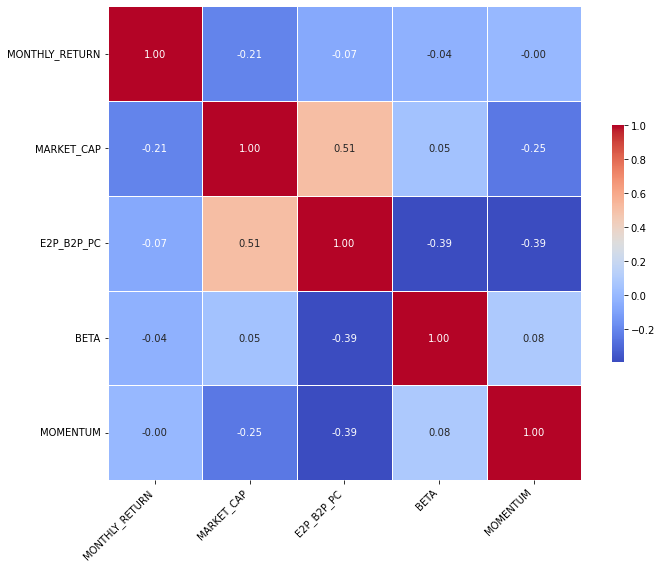

In [39]:
import seaborn as sns

correlation_matrix = factor_data[features_corr].corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adjust layout to make room for the rotated x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Display the heatmap
plt.show()


In [40]:
factor_data

MARKET_CAP  B2P_RATIO  E2P_RATIO      BETA  MOMENTUM  \
Date       TCKR                                                         
2012-06-29 AAPL    0.889369   0.524599   0.677783  0.486489  0.350909   
           AMZN    0.601199   0.144760   0.034772  0.569621  0.260586   
           GOOG    0.704805   0.918291   0.532909  0.529391  0.147920   
           META    0.526605   0.518170   0.071968  0.316294  0.114850   
           NFLX    0.039052   0.462611   0.248390  0.467584  0.156134   
...                     ...        ...        ...       ...       ...   
2019-01-30 AAPL    0.936416   0.370877   0.683902  0.746824  0.152050   
           AMZN    0.936077   0.084789   0.105551  0.868068  0.198611   
           GOOG    0.932784   0.589950   0.370844  0.746370  0.189851   
           META    0.820510   0.445848   0.421027  0.726961  0.129180   
           NFLX    0.622345   0.037905   0.069809  0.989010  0.185964   

                 E2P_B2P_PC  Daily Returns  MONTHLY_RETURN  
Date       TCKR                                             
2012-06-29 AAPL    0.425704       0.026272        0.045822  
           AMZN   -0.298574       0.031811        0.021677  
           GOOG    0.599546       0.027928        0.091196  
           META   -0.009545      -0.008291       -0.301929  
           NFLX    0.076820       0.016776       -0.169952  
...                     ...            ...             ...  
2019-01-30 AAPL    0.321956       0.068335        0.058820  
           AMZN   -0.290423       0.048027        0.000778  
           GOOG    0.253429       0.026101        0.046020  
           META    0.187776       0.043207        0.078846  
           NFLX   -0.348803       0.035756        0.048905  

[8280 rows x 8 columns]

In [41]:
factor_data[factor_data['MARKET_CAP'].isna()]

,,MARKET_CAP,B2P_RATIO,E2P_RATIO,BETA,MOMENTUM,E2P_B2P_PC,Daily Returns,MONTHLY_RETURN
Date,TCKR,,,,,,,,


In [42]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming `df` is your DataFrame containing all relevant variables
# Add a constant term for the intercept (necessary for VIF calculation)
df_with_constant = add_constant(factor_data[features])

# Create a new DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = df_with_constant.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) 
                   for i in range(df_with_constant.shape[1])]

print(vif_data)


      feature        VIF
0       const  43.116051
1  MARKET_CAP   1.502147
2  E2P_B2P_PC   1.945405
3        BETA   1.310605
4    MOMENTUM   1.186097


/Users/cameronwalcott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
# Feature Selection - Linear Regression p-value Method #

In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

#factor_data.dropna(subset=['MONTHLY_RETURN','MARKET_CAP'], inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your input features

# Defining the dependent variable and independent variables
X = factor_data[features]
y = factor_data['MONTHLY_RETURN']

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

/Users/cameronwalcott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
# Printing the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         MONTHLY_RETURN   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     102.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.96e-85
Time:                        11:34:49   Log-Likelihood:                 7269.9
No. Observations:                8280   AIC:                        -1.453e+04
Df Residuals:                    8275   BIC:                        -1.449e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1284      0.007     17.690      0.0

In [47]:
null_columns = factor_data.isna().any()
null_columns

MARKET_CAP        False
B2P_RATIO         False
E2P_RATIO         False
BETA              False
MOMENTUM          False
E2P_B2P_PC        False
Daily Returns     False
MONTHLY_RETURN    False
dtype: bool

In [48]:
#factor_data
factor_data[factor_data['MARKET_CAP'].isna()]

,,MARKET_CAP,B2P_RATIO,E2P_RATIO,BETA,MOMENTUM,E2P_B2P_PC,Daily Returns,MONTHLY_RETURN
Date,TCKR,,,,,,,,


In [49]:
# Feature Selection - Random Forest Feature Importance Method #

In [50]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [51]:

# Select features and target variable for prediction
X = factor_data[features]
y = factor_data['MONTHLY_RETURN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [53]:
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Display the feature importances
print(importance_df.sort_values(by='Importance', ascending=False))


      Feature  Importance
2        BETA    0.279330
1  E2P_B2P_PC    0.254231
3    MOMENTUM    0.250776
0  MARKET_CAP    0.215663


In [54]:
# SCALING THE PREDICTORS #

In [55]:
factor_data

MARKET_CAP  B2P_RATIO  E2P_RATIO      BETA  MOMENTUM  \
Date       TCKR                                                         
2012-06-29 AAPL    0.889369   0.524599   0.677783  0.486489  0.350909   
           AMZN    0.601199   0.144760   0.034772  0.569621  0.260586   
           GOOG    0.704805   0.918291   0.532909  0.529391  0.147920   
           META    0.526605   0.518170   0.071968  0.316294  0.114850   
           NFLX    0.039052   0.462611   0.248390  0.467584  0.156134   
...                     ...        ...        ...       ...       ...   
2019-01-30 AAPL    0.936416   0.370877   0.683902  0.746824  0.152050   
           AMZN    0.936077   0.084789   0.105551  0.868068  0.198611   
           GOOG    0.932784   0.589950   0.370844  0.746370  0.189851   
           META    0.820510   0.445848   0.421027  0.726961  0.129180   
           NFLX    0.622345   0.037905   0.069809  0.989010  0.185964   

                 E2P_B2P_PC  Daily Returns  MONTHLY_RETURN  
Date       TCKR                                             
2012-06-29 AAPL    0.425704       0.026272        0.045822  
           AMZN   -0.298574       0.031811        0.021677  
           GOOG    0.599546       0.027928        0.091196  
           META   -0.009545      -0.008291       -0.301929  
           NFLX    0.076820       0.016776       -0.169952  
...                     ...            ...             ...  
2019-01-30 AAPL    0.321956       0.068335        0.058820  
           AMZN   -0.290423       0.048027        0.000778  
           GOOG    0.253429       0.026101        0.046020  
           META    0.187776       0.043207        0.078846  
           NFLX   -0.348803       0.035756        0.048905  

[8280 rows x 8 columns]

In [56]:
factor_data

MARKET_CAP  B2P_RATIO  E2P_RATIO      BETA  MOMENTUM  \
Date       TCKR                                                         
2012-06-29 AAPL    0.889369   0.524599   0.677783  0.486489  0.350909   
           AMZN    0.601199   0.144760   0.034772  0.569621  0.260586   
           GOOG    0.704805   0.918291   0.532909  0.529391  0.147920   
           META    0.526605   0.518170   0.071968  0.316294  0.114850   
           NFLX    0.039052   0.462611   0.248390  0.467584  0.156134   
...                     ...        ...        ...       ...       ...   
2019-01-30 AAPL    0.936416   0.370877   0.683902  0.746824  0.152050   
           AMZN    0.936077   0.084789   0.105551  0.868068  0.198611   
           GOOG    0.932784   0.589950   0.370844  0.746370  0.189851   
           META    0.820510   0.445848   0.421027  0.726961  0.129180   
           NFLX    0.622345   0.037905   0.069809  0.989010  0.185964   

                 E2P_B2P_PC  Daily Returns  MONTHLY_RETURN  
Date       TCKR                                             
2012-06-29 AAPL    0.425704       0.026272        0.045822  
           AMZN   -0.298574       0.031811        0.021677  
           GOOG    0.599546       0.027928        0.091196  
           META   -0.009545      -0.008291       -0.301929  
           NFLX    0.076820       0.016776       -0.169952  
...                     ...            ...             ...  
2019-01-30 AAPL    0.321956       0.068335        0.058820  
           AMZN   -0.290423       0.048027        0.000778  
           GOOG    0.253429       0.026101        0.046020  
           META    0.187776       0.043207        0.078846  
           NFLX   -0.348803       0.035756        0.048905  

[8280 rows x 8 columns]

In [57]:
### XGBOOST FACTOR MODEL ###

In [58]:
import xgboost as xgb

# Assuming your DataFrame is named df
X = factor_data[features]
y = factor_data['MONTHLY_RETURN']

# Split your data (considering a simple chronological split here, adjust as necessary)
split_index = int(len(X) * 0.82775)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
daily_returns = factor_data['Daily Returns'].iloc[split_index:]
# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [59]:
X_test

MARKET_CAP  E2P_B2P_PC      BETA  MOMENTUM
Date       TCKR                                            
2017-12-08 META    0.868717   -0.003707  0.627848  0.243600
           NFLX    0.554534   -0.353900  0.750050  0.248071
2017-12-11 AAPL    0.947807    0.185074  0.607885  0.222089
           AMZN    0.856940   -0.361418  0.638385  0.239152
           GOOG    0.919769    0.178062  0.572696  0.200705
...                     ...         ...       ...       ...
2019-01-30 AAPL    0.936416    0.321956  0.746824  0.152050
           AMZN    0.936077   -0.290423  0.868068  0.198611
           GOOG    0.932784    0.253429  0.746370  0.189851
           META    0.820510    0.187776  0.726961  0.129180
           NFLX    0.622345   -0.348803  0.989010  0.185964

[1427 rows x 4 columns]

In [60]:
X_train

MARKET_CAP  E2P_B2P_PC      BETA  MOMENTUM
Date       TCKR                                            
2012-06-29 AAPL    0.889369    0.425704  0.486489  0.350909
           AMZN    0.601199   -0.298574  0.569621  0.260586
           GOOG    0.704805    0.599546  0.529391  0.147920
           META    0.526605   -0.009545  0.316294  0.114850
           NFLX    0.039052    0.076820  0.467584  0.156134
...                     ...         ...       ...       ...
2017-12-07 META    0.868717   -0.003603  0.634402  0.243925
           NFLX    0.554534   -0.355366  0.755394  0.247285
2017-12-08 AAPL    0.947807    0.197897  0.611766  0.220955
           AMZN    0.856940   -0.361785  0.640553  0.239048
           GOOG    0.919769    0.176086  0.573805  0.200624

[6853 rows x 4 columns]

In [61]:
# mono_const="(-1, 1, 0, 0)"
# params={'eta' : 0.3,
# 'objective' : "reg:squarederror",
# 'max_depth' : 4,
# 'subsample' : 0.6,
# 'colsample_bytree' : 0.7,
# 'lambda' : 1,
# 'gamma' : 0.1,
# 'nrounds' : 30,
# #'monotone_constraints' : mono_const,
# 'rate_drop' : 0.1, # Drop rate for DART 
# 'verbose' : 0}


# # Train the model
# bst = xgb.train(params, dtrain)


In [62]:
params = {
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'alpha': 0.1,
    'lambda': 1,
    'gamma': 0
}

bst = xgb.train(params, dtrain, num_boost_round=100)

MSE: 0.015160927618760785
RMSE: 0.12312971866596945


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

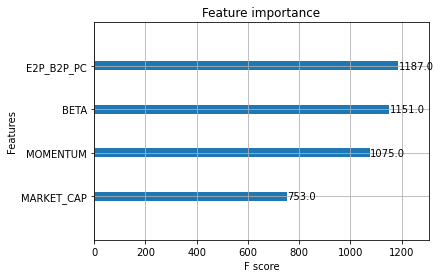

In [63]:
# Predictions
predictions = bst.predict(dtest)

# Calculate performance metrics, e.g., RMSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, predictions))
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Feature Importance
xgb.plot_importance(bst)


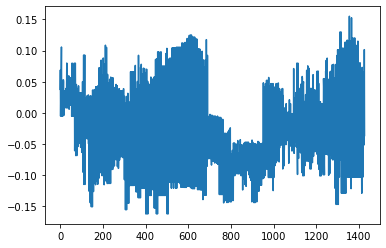

In [64]:
plt.plot(predictions)

In [65]:
y_test

Date        TCKR
2017-12-08  META    0.049385
            NFLX    0.127188
2017-12-11  AAPL    0.015116
            AMZN    0.092188
            GOOG    0.057112
                      ...   
2019-01-30  AAPL    0.058820
            AMZN    0.000778
            GOOG    0.046020
            META    0.078846
            NFLX    0.048905
Name: MONTHLY_RETURN, Length: 1427, dtype: float64

In [66]:
len(predictions)


1427

In [67]:
predictions

array([ 0.03770832,  0.06871614, -0.00538705, ..., -0.04757413,
        0.10154473, -0.03655777], dtype=float32)

In [68]:
rets = list(y_test)
rets

[0.0493854544016237,
 0.1271879274437835,
 0.0151155420051482,
 0.0921876701066778,
 0.0571119263385599,
 0.0487601168101935,
 0.1665771886431085,
 0.0313919597288823,
 0.1202664250399304,
 0.0780724432031045,
 0.0136188308763861,
 0.1911376773629907,
 0.0227549664580345,
 0.1208884761494997,
 0.0754334715040419,
 0.0005047466985432,
 0.1792292029146835,
 0.0399489306355052,
 0.102822179417268,
 0.0771936970973064,
 -0.0044284617346024,
 0.1473939797491816,
 0.0304075027246896,
 0.0968332778612589,
 0.0596735387680722,
 -0.002108944608002,
 0.1588996817259864,
 0.0115633633720384,
 0.0873523325923395,
 0.0538295961073488,
 0.002599192251283,
 0.1577565845698078,
 0.014094229451667,
 0.1178477317075693,
 0.0781455832489925,
 0.0326444253226714,
 0.2168751825045612,
 0.015428661247193,
 0.157028554221262,
 0.0955791356716895,
 0.0644218716801796,
 0.3255480541125352,
 -0.0045139895487621,
 0.1555637702858342,
 0.0937946379430664,
 0.0512820865596851,
 0.3853249631918715,
 -0.022284406713

In [69]:
list(predictions)

[0.03770832,
 0.06871614,
 -0.005387052,
 0.023974963,
 0.036363833,
 0.07048414,
 0.105736725,
 -0.005387052,
 0.023974963,
 0.036363833,
 0.048737302,
 0.051966466,
 -0.005387052,
 0.026233282,
 0.03408379,
 0.05294728,
 0.049588066,
 -0.0042161085,
 0.021914449,
 0.02206711,
 0.035236824,
 0.03258671,
 0.01287558,
 0.01669552,
 0.02206711,
 0.027470013,
 0.029821562,
 0.007849632,
 0.039228547,
 0.012269521,
 0.03247356,
 0.07995628,
 0.007849632,
 0.03859113,
 0.012269521,
 0.03247356,
 0.05922695,
 0.007849632,
 0.04527952,
 0.012269521,
 0.0390166,
 0.05922695,
 0.0057309177,
 0.056499753,
 0.012269521,
 0.0390166,
 0.03139198,
 0.019933896,
 0.056499753,
 0.012269521,
 0.0390166,
 0.03139198,
 0.039769195,
 0.046124905,
 -0.0056228912,
 0.034427565,
 0.07995628,
 0.036544703,
 0.021318126,
 -0.0056228912,
 0.02788453,
 0.0036659702,
 0.02272498,
 0.068865515,
 -0.0056228912,
 0.063014954,
 0.0798079,
 0.05768585,
 -0.06104992,
 -0.019195976,
 0.046413258,
 0.0798079,
 0.03133234

In [70]:
y_test

Date        TCKR
2017-12-08  META    0.049385
            NFLX    0.127188
2017-12-11  AAPL    0.015116
            AMZN    0.092188
            GOOG    0.057112
                      ...   
2019-01-30  AAPL    0.058820
            AMZN    0.000778
            GOOG    0.046020
            META    0.078846
            NFLX    0.048905
Name: MONTHLY_RETURN, Length: 1427, dtype: float64

In [71]:
len(predictions)

1427

In [72]:
import pandas as pd
import numpy as np


# Example dates and tickers - replace these with your actual dates and tickers
dates = y_test.index.get_level_values(0).unique() # Business days for example
dates = pd.to_datetime(dates)
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX'] * (len(predictions) // 5)


In [73]:
len(dates) * 5
len(tickers)
len(tickers[:5])

5

In [74]:
# Ensure we have the right amount of dates and tickers
assert len(dates) * len(tickers[:5]) == len(predictions), "Mismatch in length of dates, tickers, and returns"

# Create a MultiIndex from the dates and tickers
index = pd.MultiIndex.from_tuples(zip(np.repeat(dates, len(tickers[:5])), tickers), names=['Date', 'TCKR'])

# Create the DataFrame
df = pd.DataFrame({'PREDICTED_MONTHLY_RETURN': predictions}, index=index)

df

AssertionError: Mismatch in length of dates, tickers, and returns

In [75]:
df['ACTUAL_MONTHLY_RETURN'] = rets

In [76]:
daily_returns

Date        TCKR
2022-01-03  AAPL    0.025004
            AMZN    0.022118
            GOOG    0.000963
            META    0.006511
            NFLX   -0.008416
                      ...   
2023-12-26  AAPL   -0.002841
            AMZN   -0.000065
            GOOG    0.000212
            META    0.004075
            NFLX    0.009101
Name: Daily Returns, Length: 2490, dtype: float64

In [77]:
df['ACTUAL_DAILY_RETURN'] = list(daily_returns)

In [78]:
df

PREDICTED_MONTHLY_RETURN  ACTUAL_MONTHLY_RETURN  \
Date       TCKR                                                    
2022-01-03 AAPL                 -0.042855              -0.033899   
           AMZN                 -0.054637              -0.116147   
           GOOG                 -0.011995               0.020749   
           META                 -0.073171              -0.045903   
           NFLX                 -0.209263              -0.281049   
...                                   ...                    ...   
2023-12-26 AAPL                  0.036213              -0.003263   
           AMZN                  0.081435               0.037220   
           GOOG                  0.037270               0.075396   
           META                  0.019994               0.110786   
           NFLX                  0.101298               0.161302   

                 ACTUAL_DAILY_RETURN  
Date       TCKR                       
2022-01-03 AAPL             0.025004  
           AMZN             0.022118  
           GOOG             0.000963  
           META             0.006511  
           NFLX            -0.008416  
...                              ...  
2023-12-26 AAPL            -0.002841  
           AMZN            -0.000065  
           GOOG             0.000212  
           META             0.004075  
           NFLX             0.009101  

[2490 rows x 3 columns]

In [79]:
df

PREDICTED_MONTHLY_RETURN  ACTUAL_MONTHLY_RETURN  \
Date       TCKR                                                    
2022-01-03 AAPL                 -0.042855              -0.033899   
           AMZN                 -0.054637              -0.116147   
           GOOG                 -0.011995               0.020749   
           META                 -0.073171              -0.045903   
           NFLX                 -0.209263              -0.281049   
...                                   ...                    ...   
2023-12-26 AAPL                  0.036213              -0.003263   
           AMZN                  0.081435               0.037220   
           GOOG                  0.037270               0.075396   
           META                  0.019994               0.110786   
           NFLX                  0.101298               0.161302   

                 ACTUAL_DAILY_RETURN  
Date       TCKR                       
2022-01-03 AAPL             0.025004  
           AMZN             0.022118  
           GOOG             0.000963  
           META             0.006511  
           NFLX            -0.008416  
...                              ...  
2023-12-26 AAPL            -0.002841  
           AMZN            -0.000065  
           GOOG             0.000212  
           META             0.004075  
           NFLX             0.009101  

[2490 rows x 3 columns]

In [80]:
y_test

Date        TCKR
2022-01-03  AAPL   -0.033899
            AMZN   -0.116147
            GOOG    0.020749
            META   -0.045903
            NFLX   -0.281049
                      ...   
2023-12-26  AAPL   -0.003263
            AMZN    0.037220
            GOOG    0.075396
            META    0.110786
            NFLX    0.161302
Name: MONTHLY_RETURN, Length: 2490, dtype: float64

In [81]:
df

PREDICTED_MONTHLY_RETURN  ACTUAL_MONTHLY_RETURN  \
Date       TCKR                                                    
2022-01-03 AAPL                 -0.042855              -0.033899   
           AMZN                 -0.054637              -0.116147   
           GOOG                 -0.011995               0.020749   
           META                 -0.073171              -0.045903   
           NFLX                 -0.209263              -0.281049   
...                                   ...                    ...   
2023-12-26 AAPL                  0.036213              -0.003263   
           AMZN                  0.081435               0.037220   
           GOOG                  0.037270               0.075396   
           META                  0.019994               0.110786   
           NFLX                  0.101298               0.161302   

                 ACTUAL_DAILY_RETURN  
Date       TCKR                       
2022-01-03 AAPL             0.025004  
           AMZN             0.022118  
           GOOG             0.000963  
           META             0.006511  
           NFLX            -0.008416  
...                              ...  
2023-12-26 AAPL            -0.002841  
           AMZN            -0.000065  
           GOOG             0.000212  
           META             0.004075  
           NFLX             0.009101  

[2490 rows x 3 columns]

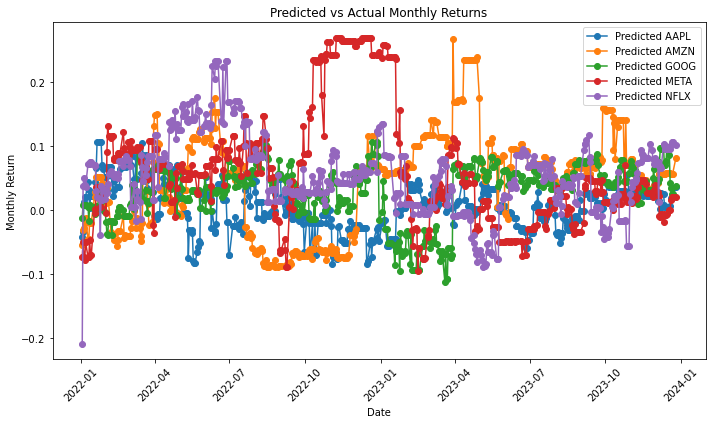

In [125]:
# Plotting
plt.figure(figsize=(10, 6))

# Loop through each stock to plot its data
for ticker in df.index.get_level_values('TCKR').unique():
    sub_data = df.xs(ticker, level='TCKR')
    plt.plot(sub_data.index, sub_data['PREDICTED_MONTHLY_RETURN'], label=f'Predicted {ticker}', marker='o')
    #plt.plot(sub_data.index, sub_data['ACTUAL_MONTHLY_RETURN'], label=f'Actual {ticker}', marker='x')

plt.title('Predicted vs Actual Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [83]:
# Group by date

weights = {
    'AAPL': 0,
    'AMZN': 0,
    'GOOG': 0,
    'META': 0,
    'NFLX': 0
    
}

daily_portfolio_value = []
count = 0
principal = 10000000
previous = 10000000
for date, date_group in df.groupby(level='Date'):

    if count == 0:
        for ticker in weights.keys():
            weight = df.loc[(date, ticker), 'PREDICTED_MONTHLY_RETURN']
            if weight < 0:
                weights[ticker] = 0
            else:      
                weights[ticker] = weight
        
        sum_weights = sum(weights.values())
        if sum_weights != 0:
            weights['AAPL'] = weights['AAPL'] / sum_weights
            weights['AMZN'] = weights['AMZN'] / sum_weights
            weights['GOOG'] = weights['GOOG'] / sum_weights
            weights['META'] = weights['META'] / sum_weights
            weights['NFLX'] = weights['NFLX'] / sum_weights
           
    
    # Access returns directly, if you have simple operations or aggregations in mind
    #print(df.loc[(date, 'GOOG'), 'MONTHLY_RETURN'])
    value = previous + previous * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'])
    previous = value
    daily_portfolio_value.append((date, value))
    
    print("Ticker Weights:", date)
    
    for ticker in weights.keys():
        print(ticker, weights[ticker])
    print(date, value)
        
    
    count += 1
    if count == 21:
        count = 0


Ticker Weights: 2022-01-03 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-03 00:00:00 10000000.0
Ticker Weights: 2022-01-04 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-04 00:00:00 10000000.0
Ticker Weights: 2022-01-05 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-05 00:00:00 10000000.0
Ticker Weights: 2022-01-06 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-06 00:00:00 10000000.0
Ticker Weights: 2022-01-07 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-07 00:00:00 10000000.0
Ticker Weights: 2022-01-10 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-10 00:00:00 10000000.0
Ticker Weights: 2022-01-11 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-11 00:00:00 10000000.0
Ticker Weights: 2022-01-12 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-12 00:00:00 10000000.0
Ticker Weights: 2022-01-13 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-13 00:00:00 10000000.0
Ticker Weights: 2022-01-14 00:00:00
AAPL 0
AMZN 0
GOOG 0
META 0
NFLX 0
2022-01-14 

NFLX 0.48497034590600546
2022-05-25 00:00:00 5643911.57063514
Ticker Weights: 2022-05-26 00:00:00
AAPL 0.17782558508799684
AMZN 0.023479727623619582
GOOG 0.09697893617163945
META 0.21674540521073865
NFLX 0.48497034590600546
2022-05-26 00:00:00 5786744.877825612
Ticker Weights: 2022-05-27 00:00:00
AAPL 0.17782558508799684
AMZN 0.023479727623619582
GOOG 0.09697893617163945
META 0.21674540521073865
NFLX 0.48497034590600546
2022-05-27 00:00:00 5935694.036325698
Ticker Weights: 2022-05-31 00:00:00
AAPL 0.17782558508799684
AMZN 0.023479727623619582
GOOG 0.09697893617163945
META 0.21674540521073865
NFLX 0.48497034590600546
2022-05-31 00:00:00 5966946.252279317
Ticker Weights: 2022-06-01 00:00:00
AAPL 0.17782558508799684
AMZN 0.023479727623619582
GOOG 0.09697893617163945
META 0.21674540521073865
NFLX 0.48497034590600546
2022-06-01 00:00:00 5868610.441300169
Ticker Weights: 2022-06-02 00:00:00
AAPL 0.17782558508799684
AMZN 0.023479727623619582
GOOG 0.09697893617163945
META 0.21674540521073865
N

AAPL 0.23108060402509958
AMZN 0.0
GOOG 0.6043955743900638
META 0.0
NFLX 0.1645238215848366
2022-09-08 00:00:00 6049698.691231074
Ticker Weights: 2022-09-09 00:00:00
AAPL 0.23108060402509958
AMZN 0.0
GOOG 0.6043955743900638
META 0.0
NFLX 0.1645238215848366
2022-09-09 00:00:00 6179445.132334371
Ticker Weights: 2022-09-12 00:00:00
AAPL 0.23108060402509958
AMZN 0.0
GOOG 0.6043955743900638
META 0.0
NFLX 0.1645238215848366
2022-09-12 00:00:00 6254404.811573018
Ticker Weights: 2022-09-13 00:00:00
AAPL 0.23108060402509958
AMZN 0.0
GOOG 0.6043955743900638
META 0.0
NFLX 0.1645238215848366
2022-09-13 00:00:00 5866546.987703086
Ticker Weights: 2022-09-14 00:00:00
AAPL 0.23108060402509958
AMZN 0.0
GOOG 0.6043955743900638
META 0.0
NFLX 0.1645238215848366
2022-09-14 00:00:00 5929117.772150641
Ticker Weights: 2022-09-15 00:00:00
AAPL 0.23108060402509958
AMZN 0.0
GOOG 0.6043955743900638
META 0.0
NFLX 0.1645238215848366
2022-09-15 00:00:00 5880861.737703705
Ticker Weights: 2022-09-16 00:00:00
AAPL 0.231

META 0.6853409926307953
NFLX 0.13064724995500143
2022-12-19 00:00:00 5239302.446701621
Ticker Weights: 2022-12-20 00:00:00
AAPL 0.0
AMZN 0.0
GOOG 0.1840117574142033
META 0.6853409926307953
NFLX 0.13064724995500143
2022-12-20 00:00:00 5327227.306864906
Ticker Weights: 2022-12-21 00:00:00
AAPL 0.0
AMZN 0.0
GOOG 0.1840117574142033
META 0.6853409926307953
NFLX 0.13064724995500143
2022-12-21 00:00:00 5440241.892423712
Ticker Weights: 2022-12-22 00:00:00
AAPL 0.0
AMZN 0.0
GOOG 0.1840117574142033
META 0.6853409926307953
NFLX 0.13064724995500143
2022-12-22 00:00:00 5337212.624263579
Ticker Weights: 2022-12-23 00:00:00
AAPL 0.0
AMZN 0.0
GOOG 0.1840117574142033
META 0.6853409926307953
NFLX 0.13064724995500143
2022-12-23 00:00:00 5375862.105031205
Ticker Weights: 2022-12-27 00:00:00
AAPL 0.0
AMZN 0.0
GOOG 0.1840117574142033
META 0.6853409926307953
NFLX 0.13064724995500143
2022-12-27 00:00:00 5293564.610521467
Ticker Weights: 2022-12-28 00:00:00
AAPL 0.0
AMZN 0.0
GOOG 0.1840117574142033
META 0.685

2023-04-03 00:00:00 7680908.9008887
Ticker Weights: 2023-04-04 00:00:00
AAPL 0.1471678415427487
AMZN 0.7538172500931445
GOOG 0.0
META 0.07207654891299932
NFLX 0.026938359451107494
2023-04-04 00:00:00 7767681.036942842
Ticker Weights: 2023-04-05 00:00:00
AAPL 0.04409312170099707
AMZN 0.548780212587423
GOOG 0.17676686568441577
META 0.23035980002716416
NFLX 0.0
2023-04-05 00:00:00 7616663.811741261
Ticker Weights: 2023-04-06 00:00:00
AAPL 0.04409312170099707
AMZN 0.548780212587423
GOOG 0.17676686568441577
META 0.23035980002716416
NFLX 0.0
2023-04-06 00:00:00 7747436.50711373
Ticker Weights: 2023-04-10 00:00:00
AAPL 0.04409312170099707
AMZN 0.548780212587423
GOOG 0.17676686568441577
META 0.23035980002716416
NFLX 0.0
2023-04-10 00:00:00 7710403.397153893
Ticker Weights: 2023-04-11 00:00:00
AAPL 0.04409312170099707
AMZN 0.548780212587423
GOOG 0.17676686568441577
META 0.23035980002716416
NFLX 0.0
2023-04-11 00:00:00 7593239.003626294
Ticker Weights: 2023-04-12 00:00:00
AAPL 0.0440931217009970

AMZN 0.34616301561811097
GOOG 0.2914243153911452
META 0.0
NFLX 0.339206161176943
2023-07-18 00:00:00 9877754.526624115
Ticker Weights: 2023-07-19 00:00:00
AAPL 0.02320650781380079
AMZN 0.34616301561811097
GOOG 0.2914243153911452
META 0.0
NFLX 0.339206161176943
2023-07-19 00:00:00 9923952.231584722
Ticker Weights: 2023-07-20 00:00:00
AAPL 0.02320650781380079
AMZN 0.34616301561811097
GOOG 0.2914243153911452
META 0.0
NFLX 0.339206161176943
2023-07-20 00:00:00 9434374.031510137
Ticker Weights: 2023-07-21 00:00:00
AAPL 0.02320650781380079
AMZN 0.34616301561811097
GOOG 0.2914243153911452
META 0.0
NFLX 0.339206161176943
2023-07-21 00:00:00 9380368.141376814
Ticker Weights: 2023-07-24 00:00:00
AAPL 0.02320650781380079
AMZN 0.34616301561811097
GOOG 0.2914243153911452
META 0.0
NFLX 0.339206161176943
2023-07-24 00:00:00 9392181.62604434
Ticker Weights: 2023-07-25 00:00:00
AAPL 0.02320650781380079
AMZN 0.34616301561811097
GOOG 0.2914243153911452
META 0.0
NFLX 0.339206161176943
2023-07-25 00:00:00 

NFLX 0.0
2023-10-26 00:00:00 8585315.831725832
Ticker Weights: 2023-10-27 00:00:00
AAPL 0.16560665526155677
AMZN 0.6326534917534881
GOOG 0.158946561838774
META 0.04279329114618117
NFLX 0.0
2023-10-27 00:00:00 8977222.57058623
Ticker Weights: 2023-10-30 00:00:00
AAPL 0.16560665526155677
AMZN 0.6326534917534881
GOOG 0.158946561838774
META 0.04279329114618117
NFLX 0.0
2023-10-30 00:00:00 9250912.789916502
Ticker Weights: 2023-10-31 00:00:00
AAPL 0.16560665526155677
AMZN 0.6326534917534881
GOOG 0.158946561838774
META 0.04279329114618117
NFLX 0.0
2023-10-31 00:00:00 9265681.556659808
Ticker Weights: 2023-11-01 00:00:00
AAPL 0.16560665526155677
AMZN 0.6326534917534881
GOOG 0.158946561838774
META 0.04279329114618117
NFLX 0.0
2023-11-01 00:00:00 9508706.738259148
Ticker Weights: 2023-11-02 00:00:00
AAPL 0.16560665526155677
AMZN 0.6326534917534881
GOOG 0.158946561838774
META 0.04279329114618117
NFLX 0.0
2023-11-02 00:00:00 9599428.63040717
Ticker Weights: 2023-11-03 00:00:00
AAPL 0.110515607497

In [84]:
daily_portfolio_value[497]

(Timestamp('2023-12-26 00:00:00'), 10786105.189301139)

In [85]:
# date = '2019-10-25 00:00:00'
# sum_weights = (df.loc[(date, 'AAPL'), 'PREDICTED_MONTHLY_RETURN'][0] + 
#                        df.loc[(date, 'AMZN'), 'PREDICTED_MONTHLY_RETURN'][0] +
#                        df.loc[(date, 'GOOG'), 'PREDICTED_MONTHLY_RETURN'][0] +
#                        df.loc[(date, 'META'), 'PREDICTED_MONTHLY_RETURN'][0] +
#                        df.loc[(date, 'NFLX'), 'PREDICTED_MONTHLY_RETURN'][0])  

# weights['AAPL'] = df.loc[(date, 'AAPL'), 'PREDICTED_MONTHLY_RETURN'] / sum_weights
# weights['AMZN'] = df.loc[(date, 'AMZN'), 'PREDICTED_MONTHLY_RETURN'] / sum_weights
# weights['GOOG'] = df.loc[(date, 'GOOG'), 'PREDICTED_MONTHLY_RETURN'] / sum_weights
# weights['META'] = df.loc[(date, 'META'), 'PREDICTED_MONTHLY_RETURN'] / sum_weights
# weights['NFLX'] = df.loc[(date, 'NFLX'), 'PREDICTED_MONTHLY_RETURN'] / sum_weights

# value = previous + previous * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'][0] + 
#                          weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'][0] + 
#                          weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'][0] + 
#                          weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'][0] + 
#                          weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'][0])

# print(weights.values())
# # print(sum_weights)
# # print(value)

In [86]:
print((12162193.271653662-10000000)/10000000)

0.21621932716536615


In [87]:
# Group by date

weights = {
    'AAPL': 0.2,
    'AMZN': 0.2,
    'GOOG': 0.2,
    'META': 0.2,
    'NFLX': 0.2
    
}

daily_portfolio_value_2 = []

principal = 10000000
previous = 10000000
for date, date_group in df.groupby(level='Date'):

    value = previous + previous * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'])
    previous = value
    daily_portfolio_value_2.append((date, value))



In [88]:
daily_portfolio_value_2[497]

(Timestamp('2023-12-26 00:00:00'), 10461270.909348521)

In [89]:
print((10368874.59408733-10000000)/10000000)

0.036887459408733066


In [90]:
# Mean Variance Optimized Portfolio

In [91]:
# Assuming `df` is your DataFrame with a MultiIndex of date and ticker
df_unstacked = df['PREDICTED_MONTHLY_RETURN'].unstack(level='TCKR')
df_unstacked

TCKR,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2022-01-03,-0.042855,-0.054637,-0.011995,-0.073171,-0.209263
2022-01-04,-0.034684,-0.031447,0.008639,-0.050360,0.037321
2022-01-05,0.012239,-0.028483,0.008639,-0.073171,0.050642
2022-01-06,0.020553,-0.020791,0.008639,-0.078160,0.038965
2022-01-07,0.020553,-0.011713,0.008639,-0.050360,0.036746
...,...,...,...,...,...
2023-12-19,0.006140,0.057395,0.041585,0.000725,0.095560
2023-12-20,0.018143,0.056873,0.033867,0.015097,0.101113
2023-12-21,0.018039,0.056873,0.025429,0.019994,0.106071


In [92]:
# Initialize a dictionary to store the monthly covariance matrices
monthly_cov_matrices = []
return_predictions = []
step = 0

while(True):
    
    if step + 21 > len(df_unstacked):
        data_until_month = df_unstacked.iloc[step:]
    else: 
        data_until_month = df_unstacked.iloc[step:step+21]
    
    return_predictions.append(data_until_month)
    # Calculate the covariance matrix for this subset of data
    cov_matrix = data_until_month.cov()
    
    # Store the covariance matrix in the dictionary, using the month as the key
    monthly_cov_matrices.append(cov_matrix)
    step += 21
    
    if(step >= len(df_unstacked)):
        break

In [93]:
len(monthly_cov_matrices)

24

In [94]:
monthly_cov_matrices[0].shape[0]

5

In [95]:
import numpy as np
import cvxpy as cp
n_stocks = 5
def optimized_weights(i,target_return):
    # Target return for the optimization
    #target_return = 0.05

    # Retrieve the covariance matrix for January 2024
    cov_matrix = monthly_cov_matrices[i]

    # Optimization variables: weights of each stock in the portfolio
    weights = cp.Variable(n_stocks)

    # Portfolio return and variance
    predicted_returns = return_predictions[i]  # Adjust as necessary
    #portfolio_return = cp.multiply(predicted_returns, weights)
    portfolio_variance = cp.quad_form(weights, cov_matrix)

    # Objective: Minimize portfolio variance
    objective = cp.Minimize(portfolio_variance)

    # Constraints
    constraints = [
        cp.sum(weights) == 1,  # Sum of weights equals 1
        weights >= 0,          # No short selling
        #portfolio_return >= target_return  # Ensure target return
    ]

    # Solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Optimized weights
    optimized_weights = weights.value

#     # Display the optimized weights
#     print("Optimized Portfolio Weights:")
#     for i, weight in enumerate(optimized_weights):
#         print(f"Stock {i+1}: {weight:.2%}")
    
    return optimized_weights


In [96]:
target_return = 0.01
min_var_weights = []
for i in range(23):
    min_var_weights.append(optimized_weights(i, target_return))

In [97]:
# Group by date

weights = {
    'AAPL': 0,
    'AMZN': 0,
    'GOOG': 0,
    'META': 0,
    'NFLX': 0
    
}

daily_portfolio_value_3 = []
count = 0
principal = 10000000
for date, date_group in df.groupby(level='Date'):

    if count == 0:
        sum_weights = sum(min_var_weights[count])
        weights['AAPL'] = min_var_weights[count][0] / sum_weights
        weights['AMZN'] = min_var_weights[count][1] / sum_weights
        weights['GOOG'] = min_var_weights[count][2] / sum_weights
        weights['META'] = min_var_weights[count][3] / sum_weights
        weights['NFLX'] = min_var_weights[count][4] / sum_weights
           
    
    # Access returns directly, if you have simple operations or aggregations in mind
    #print(df.loc[(date, 'GOOG'), 'MONTHLY_RETURN'])
    value = principal + principal * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'])
    principal = value
    daily_portfolio_value_3.append((date, value))
            
    
    count += 1
    if count == 21:
        count = 0


In [98]:
principal

9882628.39014823

In [99]:
daily_portfolio_value_3

[(Timestamp('2022-01-03 00:00:00'), 10009470.277668182),
 (Timestamp('2022-01-04 00:00:00'), 9966345.658671489),
 (Timestamp('2022-01-05 00:00:00'), 9514056.79904636),
 (Timestamp('2022-01-06 00:00:00'), 9515787.601567121),
 (Timestamp('2022-01-07 00:00:00'), 9462624.880733542),
 (Timestamp('2022-01-10 00:00:00'), 9565008.023880826),
 (Timestamp('2022-01-11 00:00:00'), 9641427.223843703),
 (Timestamp('2022-01-12 00:00:00'), 9748210.20054616),
 (Timestamp('2022-01-13 00:00:00'), 9548936.851543937),
 (Timestamp('2022-01-14 00:00:00'), 9615626.854825664),
 (Timestamp('2022-01-18 00:00:00'), 9368692.528596409),
 (Timestamp('2022-01-19 00:00:00'), 9315664.530962108),
 (Timestamp('2022-01-20 00:00:00'), 9192027.641534384),
 (Timestamp('2022-01-21 00:00:00'), 8937240.411052173),
 (Timestamp('2022-01-24 00:00:00'), 8966905.828928508),
 (Timestamp('2022-01-25 00:00:00'), 8697073.004398981),
 (Timestamp('2022-01-26 00:00:00'), 8834626.931936724),
 (Timestamp('2022-01-27 00:00:00'), 8836199.46375

In [100]:
# Bullet AAPL
weights = {
    'AAPL': 1,
    'AMZN': 0,
    'GOOG': 0,
    'META': 0,
    'NFLX': 0
    
}

daily_portfolio_value_aapl = []

principal = 10000000
previous = 10000000
for date, date_group in df.groupby(level='Date'):

    value = previous + previous * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'])
    previous = value
    daily_portfolio_value_aapl.append((date, value))



In [101]:
daily_portfolio_value_aapl

[(Timestamp('2022-01-03 00:00:00'), 10250041.50472948),
 (Timestamp('2022-01-04 00:00:00'), 10119952.10543267),
 (Timestamp('2022-01-05 00:00:00'), 9850762.569917856),
 (Timestamp('2022-01-06 00:00:00'), 9686320.488006253),
 (Timestamp('2022-01-07 00:00:00'), 9695894.073743336),
 (Timestamp('2022-01-10 00:00:00'), 9697020.630686278),
 (Timestamp('2022-01-11 00:00:00'), 9859773.30683905),
 (Timestamp('2022-01-12 00:00:00'), 9885115.252532646),
 (Timestamp('2022-01-13 00:00:00'), 9697020.630686276),
 (Timestamp('2022-01-14 00:00:00'), 9746578.824441696),
 (Timestamp('2022-01-18 00:00:00'), 9562425.86292887),
 (Timestamp('2022-01-19 00:00:00'), 9361377.984516587),
 (Timestamp('2022-01-20 00:00:00'), 9264514.710891632),
 (Timestamp('2022-01-21 00:00:00'), 9146252.011217793),
 (Timestamp('2022-01-24 00:00:00'), 9101762.03473886),
 (Timestamp('2022-01-25 00:00:00'), 8998141.138078589),
 (Timestamp('2022-01-26 00:00:00'), 8993072.920802103),
 (Timestamp('2022-01-27 00:00:00'), 8966604.4181655

In [102]:
# Bullet AMZN
weights = {
    'AAPL': 0,
    'AMZN': 1,
    'GOOG': 0,
    'META': 0,
    'NFLX': 0
    
}

daily_portfolio_value_amzn = []

principal = 10000000
previous = 10000000
for date, date_group in df.groupby(level='Date'):

    value = previous + previous * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'])
    previous = value
    daily_portfolio_value_amzn.append((date, value))



In [103]:
daily_portfolio_value_amzn

[(Timestamp('2022-01-03 00:00:00'), 10221183.208988862),
 (Timestamp('2022-01-04 00:00:00'), 10048285.895113153),
 (Timestamp('2022-01-05 00:00:00'), 9858442.709637089),
 (Timestamp('2022-01-06 00:00:00'), 9792282.878445977),
 (Timestamp('2022-01-07 00:00:00'), 9750295.740467777),
 (Timestamp('2022-01-10 00:00:00'), 9686234.579737352),
 (Timestamp('2022-01-11 00:00:00'), 9918724.799136735),
 (Timestamp('2022-01-12 00:00:00'), 9909427.679843383),
 (Timestamp('2022-01-13 00:00:00'), 9669920.231302224),
 (Timestamp('2022-01-14 00:00:00'), 9725343.25343345),
 (Timestamp('2022-01-18 00:00:00'), 9532171.300200943),
 (Timestamp('2022-01-19 00:00:00'), 9375108.743255172),
 (Timestamp('2022-01-20 00:00:00'), 9097302.618121145),
 (Timestamp('2022-01-21 00:00:00'), 8555996.655672977),
 (Timestamp('2022-01-24 00:00:00'), 8670022.28178472),
 (Timestamp('2022-01-25 00:00:00'), 8396624.00529381),
 (Timestamp('2022-01-26 00:00:00'), 8329834.481439397),
 (Timestamp('2022-01-27 00:00:00'), 8375720.58852

In [104]:
# Bullet GOOG
weights = {
    'AAPL': 0,
    'AMZN': 0,
    'GOOG': 1,
    'META': 0,
    'NFLX': 0
    
}

daily_portfolio_value_goog = []

principal = 10000000
previous = 10000000
for date, date_group in df.groupby(level='Date'):

    value = previous + previous * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'])
    previous = value
    daily_portfolio_value_goog.append((date, value))



In [105]:
daily_portfolio_value_goog

[(Timestamp('2022-01-03 00:00:00'), 10009630.232567694),
 (Timestamp('2022-01-04 00:00:00'), 9968761.261562575),
 (Timestamp('2022-01-05 00:00:00'), 9511431.608546956),
 (Timestamp('2022-01-06 00:00:00'), 9509533.371937135),
 (Timestamp('2022-01-07 00:00:00'), 9459102.639718173),
 (Timestamp('2022-01-10 00:00:00'), 9573184.34247644),
 (Timestamp('2022-01-11 00:00:00'), 9646811.06256902),
 (Timestamp('2022-01-12 00:00:00'), 9763792.790514212),
 (Timestamp('2022-01-13 00:00:00'), 9567489.632646976),
 (Timestamp('2022-01-14 00:00:00'), 9629172.841817167),
 (Timestamp('2022-01-18 00:00:00'), 9388755.170772301),
 (Timestamp('2022-01-19 00:00:00'), 9327899.93828098),
 (Timestamp('2022-01-20 00:00:00'), 9203013.455885123),
 (Timestamp('2022-01-21 00:00:00'), 8998943.539680365),
 (Timestamp('2022-01-24 00:00:00'), 9030182.278117793),
 (Timestamp('2022-01-25 00:00:00'), 8763081.847180162),
 (Timestamp('2022-01-26 00:00:00'), 8921726.813835137),
 (Timestamp('2022-01-27 00:00:00'), 8905986.829693

In [106]:
# Bullet META
weights = {
    'AAPL': 0,
    'AMZN': 0,
    'GOOG': 0,
    'META': 1,
    'NFLX': 0
    
}

daily_portfolio_value_meta = []

principal = 10000000
previous = 10000000
for date, date_group in df.groupby(level='Date'):

    value = previous + previous * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'])
    previous = value
    daily_portfolio_value_meta.append((date, value))



In [107]:
daily_portfolio_value_meta

[(Timestamp('2022-01-03 00:00:00'), 10065110.819136783),
 (Timestamp('2022-01-04 00:00:00'), 10005351.350453842),
 (Timestamp('2022-01-05 00:00:00'), 9637877.435565356),
 (Timestamp('2022-01-06 00:00:00'), 9884346.229289485),
 (Timestamp('2022-01-07 00:00:00'), 9864427.011272583),
 (Timestamp('2022-01-10 00:00:00'), 9753827.898645893),
 (Timestamp('2022-01-11 00:00:00'), 9941132.423059365),
 (Timestamp('2022-01-12 00:00:00'), 9908131.521277877),
 (Timestamp('2022-01-13 00:00:00'), 9706555.82167137),
 (Timestamp('2022-01-14 00:00:00'), 9867696.978555672),
 (Timestamp('2022-01-18 00:00:00'), 9458896.629202675),
 (Timestamp('2022-01-19 00:00:00'), 9501709.24746566),
 (Timestamp('2022-01-20 00:00:00'), 9411624.552228153),
 (Timestamp('2022-01-21 00:00:00'), 9013527.811098961),
 (Timestamp('2022-01-24 00:00:00'), 9178236.534952492),
 (Timestamp('2022-01-25 00:00:00'), 8923739.80823148),
 (Timestamp('2022-01-26 00:00:00'), 8759625.376434116),
 (Timestamp('2022-01-27 00:00:00'), 8759922.97612

In [108]:
# Bullet NFLX
weights = {
    'AAPL': 0,
    'AMZN': 0,
    'GOOG': 0,
    'META': 0,
    'NFLX': 1
    
}

daily_portfolio_value_nflx = []

principal = 10000000
previous = 10000000
for date, date_group in df.groupby(level='Date'):

    value = previous + previous * (weights['AAPL']*df.loc[(date, 'AAPL'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['AMZN']*df.loc[(date, 'AMZN'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['GOOG']*df.loc[(date, 'GOOG'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['META']*df.loc[(date, 'META'), 'ACTUAL_DAILY_RETURN'] + 
                         weights['NFLX']*df.loc[(date, 'NFLX'), 'ACTUAL_DAILY_RETURN'])
    previous = value
    daily_portfolio_value_nflx.append((date, value))



In [109]:
daily_portfolio_value_nflx

[(Timestamp('2022-01-03 00:00:00'), 9915842.120316174),
 (Timestamp('2022-01-04 00:00:00'), 9812595.810676735),
 (Timestamp('2022-01-05 00:00:00'), 9420357.500022544),
 (Timestamp('2022-01-06 00:00:00'), 9184150.716836857),
 (Timestamp('2022-01-07 00:00:00'), 8981143.273453489),
 (Timestamp('2022-01-10 00:00:00'), 8961057.921090554),
 (Timestamp('2022-01-11 00:00:00'), 8977491.943823425),
 (Timestamp('2022-01-12 00:00:00'), 8917402.040469177),
 (Timestamp('2022-01-13 00:00:00'), 8618285.806104472),
 (Timestamp('2022-01-14 00:00:00'), 8726014.214046743),
 (Timestamp('2022-01-18 00:00:00'), 8478852.428838337),
 (Timestamp('2022-01-19 00:00:00'), 8562844.154787607),
 (Timestamp('2022-01-20 00:00:00'), 8436524.764960857),
 (Timestamp('2022-01-21 00:00:00'), 6598167.425621132),
 (Timestamp('2022-01-24 00:00:00'), 6426365.983791707),
 (Timestamp('2022-01-25 00:00:00'), 6082265.652061724),
 (Timestamp('2022-01-26 00:00:00'), 5970719.254188573),
 (Timestamp('2022-01-27 00:00:00'), 6418896.6642

In [110]:
# Visualizations
#1 Proportional Portfolio: Portfolio Values
#2 Equal Portfolio: Portfolio Values
#3 Mean Variance Portfolio: Portfolio Values
#4 Stock Prices Over Time on Same Graph


In [111]:
daily_portfolio_value = pd.DataFrame(daily_portfolio_value, columns=['Date', 'Value'])
daily_portfolio_value_2 = pd.DataFrame(daily_portfolio_value_2, columns=['Date', 'Value'])
daily_portfolio_value_3 = pd.DataFrame(daily_portfolio_value_3, columns=['Date', 'Value'])
daily_portfolio_value_aapl = pd.DataFrame(daily_portfolio_value_aapl, columns=['Date', 'Value'])
daily_portfolio_value_amzn = pd.DataFrame(daily_portfolio_value_amzn, columns=['Date', 'Value'])
daily_portfolio_value_goog = pd.DataFrame(daily_portfolio_value_goog, columns=['Date', 'Value'])
daily_portfolio_value_meta = pd.DataFrame(daily_portfolio_value_meta, columns=['Date', 'Value'])
daily_portfolio_value_nflx = pd.DataFrame(daily_portfolio_value_nflx, columns=['Date', 'Value'])

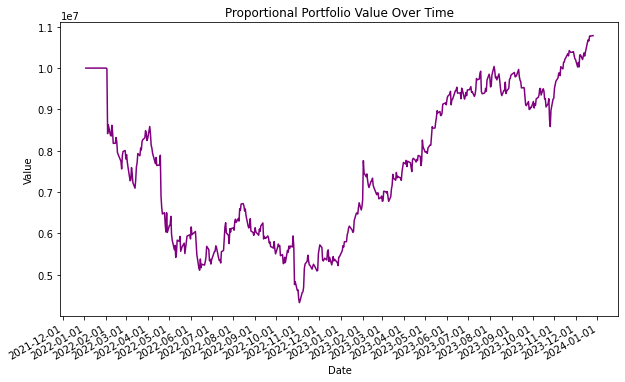

In [112]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = daily_portfolio_value['Date']
values = daily_portfolio_value['Value']

# Plotting
plt.figure(figsize=(10, 6)) # Optional: specifies the size of the figure
plt.plot(dates, values, linestyle='-', color='purple') # 'o', '-', and 'b' specify the marker style, line style, and color

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


plt.gcf().autofmt_xdate() # Rotation



plt.title('Proportional Portfolio Value Over Time') # Title
plt.xlabel('Date') # X-axis label
plt.ylabel('Value') # Y-axis label

plt.show() # Display the plot


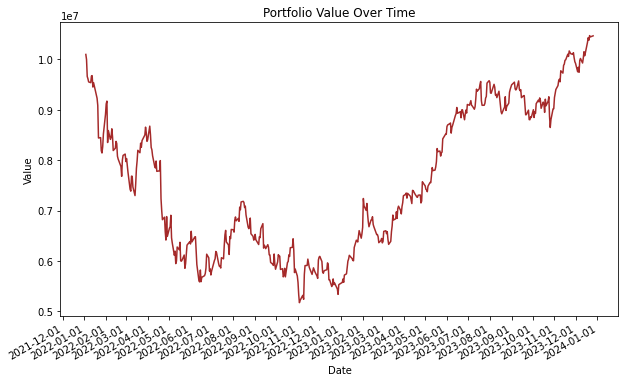

In [113]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = daily_portfolio_value_2['Date']
values = daily_portfolio_value_2['Value']

# Plotting
plt.figure(figsize=(10, 6)) # Optional: specifies the size of the figure
plt.plot(dates, values, linestyle='-', color='brown') # 'o', '-', and 'b' specify the marker style, line style, and color

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gcf().autofmt_xdate() # Rotation



plt.title('Portfolio Value Over Time') # Title
plt.xlabel('Date') # X-axis label
plt.ylabel('Value') # Y-axis label

plt.show() # Display the plot


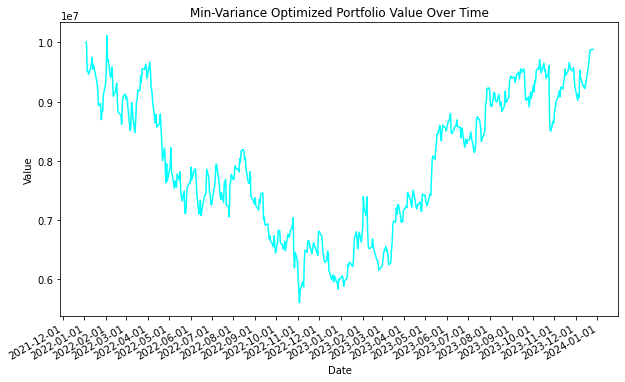

In [114]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = daily_portfolio_value_3['Date']
values = daily_portfolio_value_3['Value']

# Plotting
plt.figure(figsize=(10, 6)) # Optional: specifies the size of the figure
plt.plot(dates, values, linestyle='-', color='cyan') # 'o', '-', and 'b' specify the marker style, line style, and color

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gcf().autofmt_xdate() # Rotation



plt.title('Min-Variance Optimized Portfolio Value Over Time') # Title
plt.xlabel('Date') # X-axis label
plt.ylabel('Value') # Y-axis label

plt.show() # Display the plot


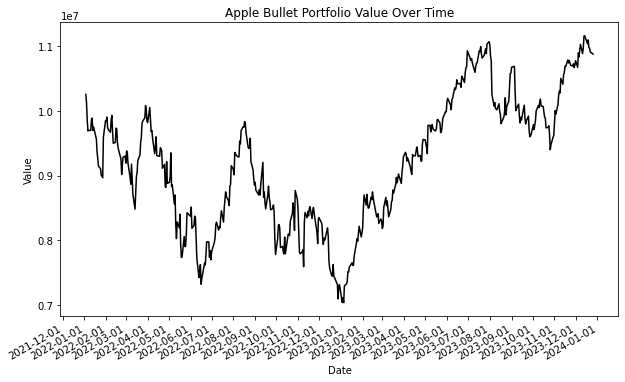

In [115]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = daily_portfolio_value_aapl['Date']
values = daily_portfolio_value_aapl['Value']

# Plotting
plt.figure(figsize=(10, 6)) # Optional: specifies the size of the figure
plt.plot(dates, values, linestyle='-', color='black') # 'o', '-', and 'b' specify the marker style, line style, and color

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gcf().autofmt_xdate() # Rotation


plt.title('Apple Bullet Portfolio Value Over Time') # Title
plt.xlabel('Date') # X-axis label
plt.ylabel('Value') # Y-axis label

plt.show() # Display the plot


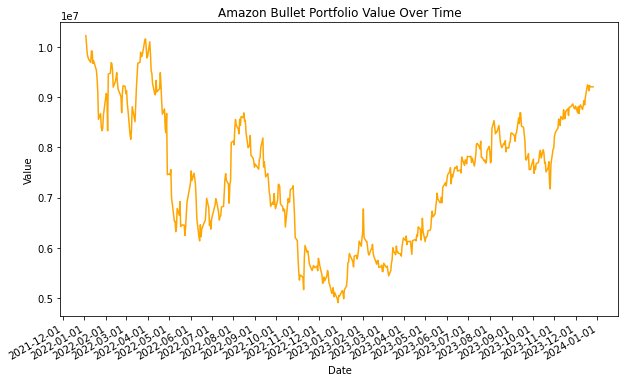

In [116]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = daily_portfolio_value_amzn['Date']
values = daily_portfolio_value_amzn['Value']

# Plotting
plt.figure(figsize=(10, 6)) # Optional: specifies the size of the figure
plt.plot(dates, values, linestyle='-', color='orange') # 'o', '-', and 'b' specify the marker style, line style, and color

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gcf().autofmt_xdate() # Rotation



plt.title('Amazon Bullet Portfolio Value Over Time') # Title
plt.xlabel('Date') # X-axis label
plt.ylabel('Value') # Y-axis label

plt.show() # Display the plot


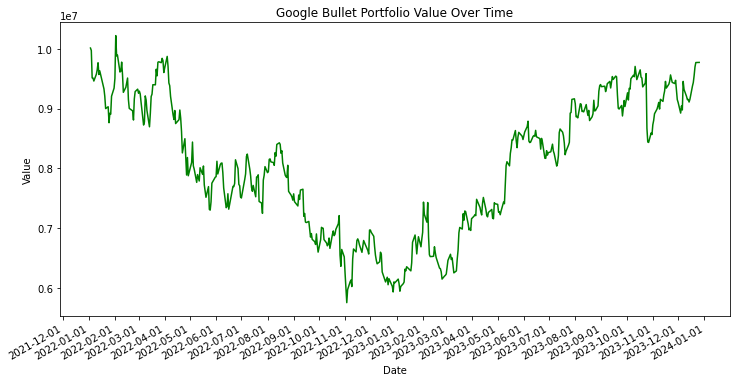

In [117]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = daily_portfolio_value_goog['Date']
values = daily_portfolio_value_goog['Value']

# Plotting
plt.figure(figsize=(12, 6)) # Optional: specifies the size of the figure
plt.plot(dates, values, linestyle='-', color='green') # 'o', '-', and 'b' specify the marker style, line style, and color

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gcf().autofmt_xdate() # Rotation

# Formatting the y-axis as dollars


plt.title('Google Bullet Portfolio Value Over Time') # Title
plt.xlabel('Date') # X-axis label
plt.ylabel('Value') # Y-axis label

plt.show() # Display the plot


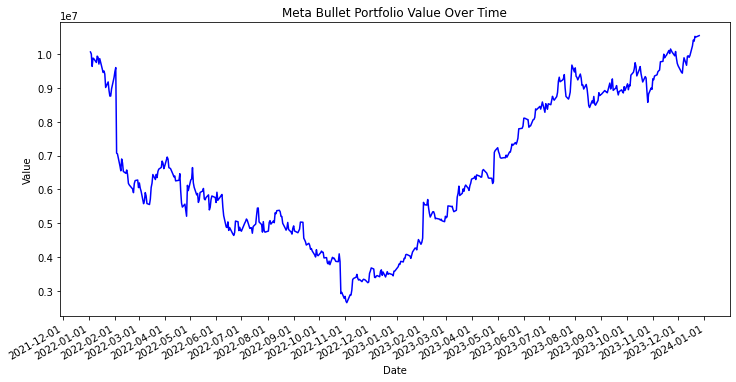

In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = daily_portfolio_value_meta['Date']
values = daily_portfolio_value_meta['Value']

# Plotting
plt.figure(figsize=(12, 6)) # Optional: specifies the size of the figure
plt.plot(dates, values, linestyle='-', color='b') # 'o', '-', and 'b' specify the marker style, line style, and color

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.gcf().autofmt_xdate() # Rotation

# Formatting the y-axis as dollars

plt.title('Meta Bullet Portfolio Value Over Time') # Title
plt.xlabel('Date') # X-axis label
plt.ylabel('Value') # Y-axis label

plt.show() # Display the plot


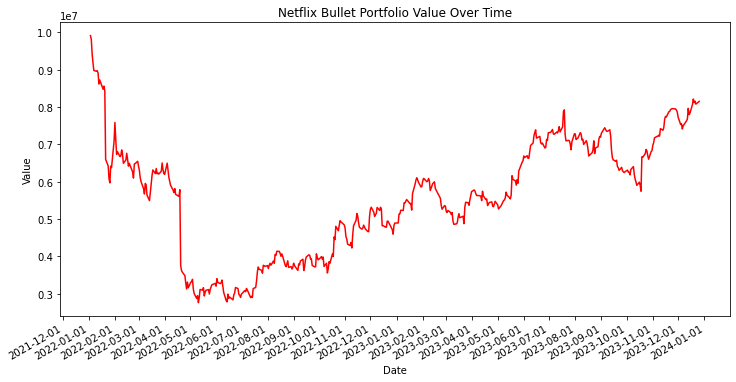

In [119]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data
dates = daily_portfolio_value_nflx['Date']
values = daily_portfolio_value_nflx['Value']

# Plotting
plt.figure(figsize=(12, 6)) # Optional: specifies the size of the figure
plt.plot(dates, values, linestyle='-', color='r') # 'o', '-', and 'b' specify the marker style, line style, and color

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # Rotation


plt.title('Netflix Bullet Portfolio Value Over Time') # Title
plt.xlabel('Date') # X-axis label
plt.ylabel('Value') # Y-axis label

plt.show() # Display the plot


In [120]:
daily_portfolio_value

,Date,Value
0,2022-01-03,1.000000e+07
1,2022-01-04,1.000000e+07
2,2022-01-05,1.000000e+07
3,2022-01-06,1.000000e+07
4,2022-01-07,1.000000e+07
...,...,...
493,2023-12-19,1.068379e+07
494,2023-12-20,1.065770e+07
495,2023-12-21,1.077642e+07
496,2023-12-22,1.077433e+07


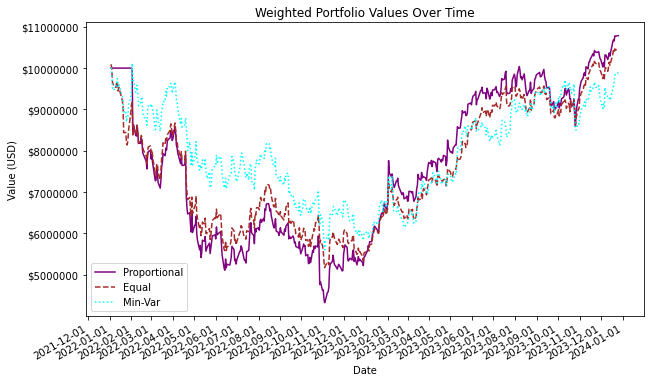

In [121]:
# All Constructed/Weighted Portfolios
import matplotlib.ticker as ticker

# Plotting each portfolio with specified colors
plt.figure(figsize=(10, 6))

plt.plot(daily_portfolio_value['Date'], daily_portfolio_value['Value'], linestyle='-', color='purple', label='Proportional')
plt.plot(daily_portfolio_value_2['Date'], daily_portfolio_value_2['Value'],linestyle='--',  color='brown', label='Equal')
plt.plot(daily_portfolio_value_3['Date'], daily_portfolio_value_3['Value'], linestyle=':', color='cyan', label='Min-Var')

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # Rotation

# Formatting the y-axis as dollars
def dollars(x, pos):
    return '$%1.0f' % x
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(dollars))

plt.title('Weighted Portfolio Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value (USD)')

plt.legend() # Display legend

plt.show()

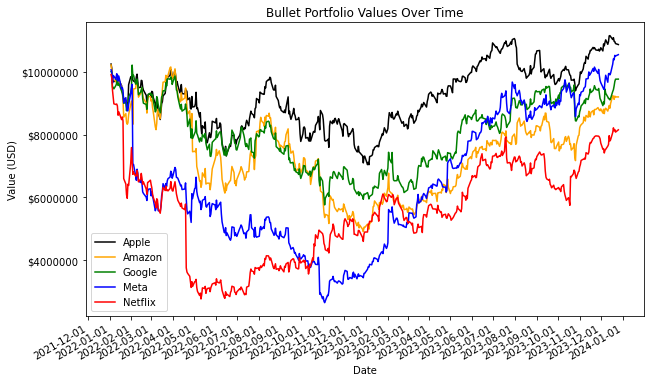

In [122]:
# All Bullet Portfolios
import matplotlib.ticker as ticker

# Plotting each portfolio with specified colors
plt.figure(figsize=(10, 6))

plt.plot(daily_portfolio_value_aapl['Date'], daily_portfolio_value_aapl['Value'], linestyle='-', color='black', label='Apple')
plt.plot(daily_portfolio_value_amzn['Date'], daily_portfolio_value_amzn['Value'], linestyle='-', color='orange', label='Amazon')
plt.plot(daily_portfolio_value_goog['Date'], daily_portfolio_value_goog['Value'], linestyle='-', color='green', label='Google')
plt.plot(daily_portfolio_value_meta['Date'], daily_portfolio_value_meta['Value'], linestyle='-', color='blue', label='Meta')
plt.plot(daily_portfolio_value_nflx['Date'], daily_portfolio_value_nflx['Value'], linestyle='-', color='red', label='Netflix')

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # Rotation

# Formatting the y-axis as dollars
def dollars(x, pos):
    return '$%1.0f' % x
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(dollars))

plt.title('Bullet Portfolio Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value (USD)')

plt.legend() # Display legend

plt.show()